In [3]:
import pandas as pd    
import geopandas as gpd
import datetime
from geopandas.tools import geocode
#import geoplot
from shapely.geometry import Point
import numpy as np
import scipy.stats as stats
import scipy
import shapely
from shapely import speedups
speedups.enabled
import seaborn as sns
import matplotlib 
from matplotlib import pyplot as plt
matplotlib.rcParams.update({'font.size': 20})

## Zip code boundaries

In [4]:
# Zip code boundaries
zipcodes_url = 'https://opendata.arcgis.com/datasets/83fc2e72903343aabff6de8cb445b81c_2.geojson'
zipcodes = gpd.read_file(zipcodes_url)
zipcodes_columns = ['ZIPCODE', 'SHAPE_Area', 'geometry']
zipcodes_cleaned = zipcodes.loc[:,zipcodes_columns]
zipcodes_cleaned['ZIPCODE'] = zipcodes_cleaned['ZIPCODE'].astype(int)

## Census tract boundaries

In [5]:
# Census tract boundaries
census_url = 'https://opendata.arcgis.com/datasets/de58dc3e1efc49b782ab357e044ea20c_9.geojson'
census_bounds = gpd.read_file(census_url)
census_columns = ['NAME10', 'SHAPE_Area', 'geometry']
census_bounds_cleaned = census_bounds.loc[:,census_columns]
census_bounds_cleaned['NAME10'] = census_bounds_cleaned['NAME10'].astype(float)

In [6]:
# Filters out tracts with irregular traffic data
filter1 = census_bounds_cleaned['NAME10'] == 260.01
filter2 = census_bounds_cleaned['NAME10'] == 264.0
indices1 = census_bounds_cleaned[filter1].index
indices2 = census_bounds_cleaned[filter2].index
census_bounds_cleaned = census_bounds_cleaned.drop(indices1)
census_bounds_cleaned = census_bounds_cleaned.drop(indices2)

## Areas: zip codes joined with census tracts

In [7]:
# Zip codes joined with census tracts
zips = gpd.sjoin(zipcodes_cleaned, census_bounds_cleaned, op='intersects')
zips_columns = ['ZIPCODE', 'NAME10', 'SHAPE_Area_left', 'geometry']
zips = zips[zips_columns]

In [8]:
zips.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
len(zips['ZIPCODE'])

286

In [10]:
zips = zips.dissolve(by='ZIPCODE')

In [11]:
len(zips)

32

<AxesSubplot:>

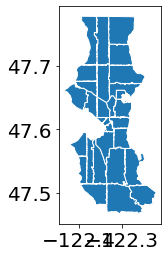

In [12]:
zips.plot(edgecolor='white')

In [135]:
# List of areas (zip codes)
#zip_list = np.sort(list(set(zips['ZIPCODE'])))

In [136]:
#len(zip_list)

32

In [113]:
# Creates a list of 1) lists of included tracts, 2) areas, and 3) geometries for each zip code
#tracts = []*len(zip_list)
#areas = []
#geometries = []

#for zipcode in zip_list:
    #area_tracts = []
    #filter = zips['ZIPCODE'] == zipcode
    #for tract in zips[filter]['NAME10']:
        #area_tracts.append(tract)
        
    #tracts.append(area_tracts)
    
    #index = zips[zips['ZIPCODE']==zipcode].index[0]
    #area = zips.iloc[index]['SHAPE_Area_left']
    #geometry = zips.iloc[index]['geometry']
    #areas.append(area)
    #geometries.append(geometry)

In [114]:
# Zip codes with included tracts
#zips_cleaned = gpd.GeoDataFrame()
#zips_cleaned['Zipcode'] = zip_list
#zips_cleaned['Tracts'] = tracts
#zips_cleaned['Area'] = areas
#zips_cleaned['geometry'] = geometries

In [16]:
zips.head()

,ZIPCODE,geometry,NAME10,SHAPE_Area_left
0,98101,"POLYGON ((-122.34598 47.60892, -122.34490 47.6...",74.02,1.470012e+07
1,98102,"POLYGON ((-122.33574 47.64203, -122.33108 47.6...",74.02,4.322189e+07
2,98103,"POLYGON ((-122.35808 47.69966, -122.35741 47.6...",45.00,1.440083e+08
3,98104,"POLYGON ((-122.34105 47.59627, -122.34031 47.5...",84.00,2.108730e+07
4,98105,"MULTIPOLYGON (((-122.32859 47.66646, -122.3285...",43.01,9.703543e+07


In [15]:
zips.reset_index(inplace=True)

In [17]:
zips.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

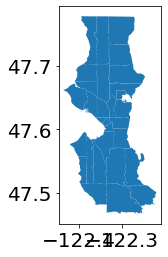

In [18]:
zips.plot()

In [45]:

census_bounds_cleaned[0:20].plot()

KeyError: 0

In [42]:
a = zips_cleaned.iloc[0]
a['geometry'].plot()

AttributeError: 'MultiPolygon' object has no attribute 'plot'

In [54]:
zips_cleaned.head()#[:].plot()#iloc[:,0].plot()

,Zipcode,Tracts,Area,geometry
0,98101,"[81.0, 82.0, 83.0, 80.02, 84.0, 72.0, 74.02, 7...",8.818645e+07,"MULTIPOLYGON (((-122.30683 47.64729, -122.3123..."
1,98102,"[74.02, 73.0, 74.01, 75.0, 65.0, 66.0, 62.0, 6...",4.322189e+07,"POLYGON ((-122.31232 47.64705, -122.31321 47.6..."
2,98103,"[45.0, 46.0, 36.0, 27.0, 19.0, 12.0, 54.0, 49....",1.813559e+08,"POLYGON ((-122.27294 47.70107, -122.27337 47.7..."
3,98104,"[81.0, 82.0, 83.0, 84.0, 75.0, 93.0, 90.0, 91....",1.440083e+08,"POLYGON ((-122.32925 47.70319, -122.33052 47.7..."
4,98105,"[41.0, 42.0, 43.01, 45.0, 44.0, 46.0, 36.0, 54...",9.703543e+07,"MULTIPOLYGON (((-122.30978 47.67381, -122.3103..."


## Bike rack data

In [16]:
#Bike racks
racks_url = 'https://opendata.arcgis.com/datasets/f86c29ce743e47819e588c3d643ceb63_0.geojson'
racks = gpd.read_file(racks_url)

In [17]:
racks_cleaned = racks[['geometry']]

In [18]:
racks_cleaned.head()

,geometry
0,POINT (-122.33552 47.61355)
1,POINT (-122.31602 47.65228)
2,POINT (-122.33449 47.61397)
3,POINT (-122.38657 47.58316)
4,POINT (-122.31426 47.65824)


## Parking data

In [4]:
#Parking -- street signs indicate parking zone and date of installation
street_signs_url = 'https://gisdata.seattle.gov/server/rest/services/SDOT/SDOT_Signs/MapServer/0/query?where=1%3D1&outFields=OBJECTID,COMPKEY,COMPTYPE,CATEGORY,CATEGORYDESCR,ADDDTTM,MODDTTM,INSTDATE,SHAPE_LNG,SHAPE_LAT&outSR=4326&f=json'
street_signs = gpd.read_file(street_signs_url)

## Bike lane and walkway data

In [5]:
#Bike lanes and walkways
df_SND = gpd.read_file('Street_Network_Database_SND.geojson')

## Population data

In [20]:
#Population
pop_url_2010 = 'https://gisrevprxy.seattle.gov/arcgis/rest/services/CENSUS_EXT/CENSUS_2010_BASICS/MapServer/15/query?where=1%3D1&outFields=SHAPE,GEOID10,NAME10,ACRES_TOTAL,Total_Population,OBJECTID&outSR=4326&f=json'
#pop_url_2000

## Traffic ##

In [21]:
url_list = ['https://opendata.arcgis.com/datasets/7015d5d46a284f94ac05c2ea4358bcd7_0.geojson',
            'https://opendata.arcgis.com/datasets/5fc63b2a48474100b560a7d98b5097d7_1.geojson',
            'https://opendata.arcgis.com/datasets/27af9a2485c5442bb061fa7e881d7022_2.geojson',
            'https://opendata.arcgis.com/datasets/4f62515558174f53979b3be0335004d3_3.geojson',
            'https://opendata.arcgis.com/datasets/29f801d03c9b4b608bca6a8e497278c3_4.geojson',
            'https://opendata.arcgis.com/datasets/a0019dd0d6464747a88921f5e103d509_5.geojson',
            'https://opendata.arcgis.com/datasets/40bcfbc4054549ebba8b5777bbdd40ff_6.geojson',
            'https://opendata.arcgis.com/datasets/16cedd233d914118a275c6510115d466_7.geojson',
            'https://opendata.arcgis.com/datasets/902fd604ecf54adf8579894508cacc68_8.geojson',
            'https://opendata.arcgis.com/datasets/170b764c52f34c9497720c0463f3b58b_9.geojson',
            'https://opendata.arcgis.com/datasets/2c37babc94d64bbb938a9b520bc5538c_10.geojson',
            'https://opendata.arcgis.com/datasets/a35aa9249110472ba2c69cc574eff984_11.geojson']

In [22]:
def get_gdf(year):
    '''Enter the desired year to download the traffic flow count
    data for that year. Example: enter '7' for the year 2007.
    '''
    num = year-7
    gdf_year = gpd.read_file(url_list[num])
    if year == 11:
        gdf_year = gdf_year.rename(columns={"YEAR_" : 'YEAR'})
    if year == 12:
        gdf_year = gdf_year.rename(columns={'STDY_YEAR' : 'YEAR'})
    if year == 15 or year == 16:
        gdf_year = gdf_year.rename(columns={"COUNTAAWDT" : 'AAWDT', "FLOWSEGID" : "GEOBASID", 'FIRST_STNAME_ORD' : 'STNAME'})
        gdf_year = gdf_year[['AAWDT', 'GEOBASID', 'STNAME', 'SHAPE_Length', 'geometry']]
        if year == 15:
            year_list = ['2015']*len(gdf_year)
            gdf_year['YEAR'] = year_list
        elif year == 16:
            year_list = ['2016']*len(gdf_year)
            gdf_year['YEAR'] = year_list
    elif year == 17 or year == 18:
        gdf_year = gdf_year.rename(columns={"AWDT" : 'AAWDT', "FLOWSEGID" : "GEOBASID", 'STNAME_ORD' : 'STNAME'})
        gdf_year = gdf_year[['AAWDT', 'GEOBASID', 'STNAME', 'SHAPE_Length', 'geometry']]
        if year == 17:
            year_list = ['2017']*len(gdf_year)
            gdf_year['YEAR'] = year_list
        elif year == 18:
            year_list = ['2016']*len(gdf_year)
            gdf_year['YEAR'] = year_list
    #df_year_AAWDT = df_year['AAWDT'].values
    #df_year_geobase = df_year['GEOBASID'].values
    #df_year_dist = df_year['SHAPE_Length'].values
    gdf_year = gdf_year[[ 'YEAR', 'AAWDT','geometry']]
    return gdf_year #, df_year_AAWDT, df_year_geobase, df_year_dist

In [23]:
def get_traffic_df(year):
    gdf_year = get_gdf(year)
    traffic = gpd.sjoin(gdf_year,census_bounds_cleaned,op='intersects')
    traffic['TOTAL FLOW DENSITY'] = 43650*traffic['AAWDT'] / traffic['SHAPE_Area']
    #traffic_clean = traffic.drop(columns=['index_right','SHAPE_Area'])
    #traffic_clean.dissolve(by='NAME10')
    df_traffic = traffic.dissolve(by='NAME10')
    df = df_traffic.drop(columns=['geometry','AAWDT','index_right','SHAPE_Area'])

    return df

## Bike Lanes ##

In [11]:
lane_columns = ['SEGMENT_TY', 'SNDSEG_UPD', 'SHAPE_Leng', 'geometry']
bike = df_SND[lane_columns]

In [12]:
# Creates list of years in each row
snd_years = []
for i in df_SND['SNDSEG_UPD'].values:
    snd_years.append(int(i[0:4]))
    
snd_year = snd_years
snd_year_df = pd.Series(snd_year)

In [53]:
bike['YEAR'] = snd_year_df

In [54]:
#Specify segment type to extract, for walkways this will be 5
bike = bike[bike['SEGMENT_TY']==6]


In [15]:
bike_cleaned = bike.drop(columns=['SNDSEG_UPD', 'SEGMENT_TY'])

In [55]:
lane_by_tract = gpd.sjoin(census_bounds_cleaned, bike, op='intersects')
lanes_years = lane_by_tract.dissolve(by=['NAME10','YEAR'])
lanes_years.drop(columns=['geometry','SHAPE_Area','index_right'])

SEGMENT_TY  SNDSEG_UPD  SHAPE_Leng
NAME10 YEAR                                    
1      2011           6  2011-02-24  398.194434
10     2013           6  2013-02-01  132.485680
       2017           6  2017-02-03  209.540786
100.01 2017           6  2017-03-15  226.928120
100.02 2004           6  2004-05-19  138.151384
...                 ...         ...         ...
99     2011           6  2011-02-24  216.416233
       2014           6  2014-12-18   65.067733
       2015           6  2015-05-22   59.955099
       2017           6  2017-02-02  148.163251
       2018           6  2018-03-23  103.611745

[173 rows x 3 columns]

In [56]:
#Automate this process into function
#Take multiindexed DF as shown above, convert and process to form below
lengths = pd.Series(43560*lanes_years['SHAPE_Leng'].values / lanes_years['SHAPE_Area'].values)

year_lane = []
tract_lane = []

for i in range(np.size(lengths)):
    year_lane.append(lanes_years.index.values[i][0])
for k in range(np.size(lengths)):
    tract_lane.append(lanes_years.index.values[k][1])

df_lanes = pd.DataFrame(np.stack((year_lane,tract_lane,lengths)).T)

In [57]:
df_lanes.head()

,0,1,2
0,1,2011,0.8714617619474354
1,10,2013,0.561771181757596
2,10,2017,0.8885033805558079
3,100.01,2017,0.3968428770965108
4,100.02,2004,0.5896069313812291


In [19]:
import os

In [20]:
print(os.path)

<module 'posixpath' from '/Users/stlp/opt/anaconda3/lib/python3.8/posixpath.py'>


In [21]:
#df_lanes.to_csv(r'~/Project/Prediction/df_lanes.csv')

In [22]:
#pd.read_csv('df_lanes.csv')

## Walkways ##

In [23]:
walk_columns = ['SEGMENT_TY', 'SNDSEG_UPD', 'SHAPE_Leng', 'geometry']
walk = df_SND[walk_columns]
walk.head()

,SEGMENT_TY,SNDSEG_UPD,SHAPE_Leng,geometry
0,1,2007-04-22,291.426335,"LINESTRING (-122.32286 47.52981, -122.32287 47..."
1,1,2007-04-22,431.467882,"LINESTRING (-122.32400 47.61848, -122.32401 47..."
2,1,2004-05-19,162.446146,"LINESTRING (-122.29191 47.76490, -122.29126 47..."
3,6,2004-05-19,79.522621,"LINESTRING (-122.30780 47.61410, -122.30748 47..."
4,1,2012-10-12,643.835648,"LINESTRING (-122.38213 47.67455, -122.38474 47..."


In [24]:
walks_years = []
for k in walk['SNDSEG_UPD'].values:
    walks_years.append(int(k[0:4]))

walk_years = walks_years

In [25]:
walk['YEAR'] = pd.Series(walk_years)

/Users/stlp/opt/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [26]:
walks = walk[walk['SEGMENT_TY']==5]

In [27]:
walks_cleaned = walks.drop(columns=['SEGMENT_TY'])

In [28]:
walks_data = walks_cleaned.dissolve('YEAR')
walks_data.head(n=25)

,geometry,SNDSEG_UPD,SHAPE_Leng
YEAR,,,
2004,"MULTILINESTRING ((-122.31491 47.69172, -122.31...",2004-07-19,165.967550
2005,"LINESTRING (-122.32653 47.64449, -122.32653 47...",2005-05-04,412.348264
2008,"LINESTRING (-122.38645 47.54191, -122.38646 47...",2008-04-09,465.983637
2014,"LINESTRING (-122.38163 47.69059, -122.38162 47...",2014-12-18,665.738612
2015,"MULTILINESTRING ((-122.34646 47.53375, -122.34...",2015-03-27,666.636653
2016,"MULTILINESTRING ((-122.39294 47.65711, -122.39...",2016-12-23,471.639054
2017,"MULTILINESTRING ((-122.30118 47.64349, -122.30...",2017-03-14,247.401227
2018,"MULTILINESTRING ((-122.39685 47.56481, -122.39...",2018-08-07,205.825219
2019,"MULTILINESTRING ((-122.32441 47.59919, -122.32...",2019-02-08,306.056518


In [58]:
walks_by_tract = gpd.sjoin(census_bounds_cleaned, walks_data, op='intersects')
walks_by_tract.dissolve(by=['index_right','NAME10'])
walks_by_tract.drop(columns=['geometry','SHAPE_Area','SNDSEG_UPD'])

,NAME10,index_right,SHAPE_Leng
8,58.01,2016,471.639054
123,80.01,2016,471.639054
126,71,2016,471.639054
11,32,2018,205.825219
47,43.01,2018,205.825219
50,44,2018,205.825219
60,92,2018,205.825219
116,107.02,2018,205.825219
118,99,2018,205.825219
119,97.02,2018,205.825219


## Bike Racks ##

In [30]:
racks_df = gpd.read_file('Bike_Racks.geojson')
racks_df.head()

,OBJECTID,COMPKEY,COMPTYPE,SEGKEY,DISTANCE,WIDTH,UNITID,UNITTYPE,UNITDESC,BIKE_FACILITY,...,SIDE,OWNERSHIP,CURRENT_STATUS,PRIMARYDISTRICTCD,SECONDARYDISTRICTCD,OVERRIDEYN,OVERRIDECOMMENT,SHAPE_LNG,SHAPE_LAT,geometry
0,1,519234,16,12044,240.0,30.0,BKR-2855,BKR,OLIVE WAY 0060 BLOCK NW SIDE ( 225) 51 FT SW/O...,SGL,...,NW,SDOT,INSVC,DISTRICT7,,N,None,-122.335519,47.613547,POINT (-122.33552 47.61355)
1,2,518964,16,17977,512.0,-28.0,BKR-1790,BKR,NE BOAT ST 0110 BLOCK SW SIDE ( 512) 363 FT NW...,SGL,...,SW,SDOT,INSVC,DISTRICT4,,N,None,-122.316016,47.652276,POINT (-122.31602 47.65228)
2,3,519236,16,12045,216.0,29.0,BKR-2895,BKR,OLIVE WAY 0070 BLOCK NW SIDE ( 196) 80 FT SW/O...,SGL,...,NW,SDOT,INSVC,DISTRICT7,,N,None,-122.334488,47.613973,POINT (-122.33449 47.61397)
3,4,519257,16,9538,310.0,-25.0,BKR-1107,BKR,CALIFORNIA AVE SW 0220 BLOCK W SIDE ( 280) 27 ...,SGL,...,W,SDOT,INSVC,DISTRICT1,,N,None,-122.386571,47.583156,POINT (-122.38657 47.58316)
4,5,640211,16,9479,509.0,-26.5,BKR-3674,BKR,BROOKLYN AVE NE 0410 BLOCK E SIDE ( 501) 10 FT...,ONST,...,E,SDOT,INSVC,DISTRICT4,,N,None,-122.314258,47.658240,POINT (-122.31426 47.65824)


## Parking ##

In [31]:
park_times = []
for timestamp in street_signs['ADDDTTM'].values:
    x = timestamp[:10]
    x_time = datetime.datetime.fromtimestamp(int(x)).isoformat()
    x_year = (int(x_time[0:4]))
    park_times.append(x_year)

In [32]:
street_signs['PARK YEAR'] = pd.Series(park_times)

In [33]:
keep_list = ['PPP','PR','PRZ','PTIML','PINST','PCARPL']

## Population ##

In [26]:
pop_url_2010 = 'https://gisrevprxy.seattle.gov/arcgis/rest/services/CENSUS_EXT/CENSUS_2010_BASICS/MapServer/15/query?where=1%3D1&outFields=SHAPE,GEOID10,NAME10,ACRES_TOTAL,Total_Population,OBJECTID&outSR=4326&f=json'
#pop_url_2000 =

In [27]:
pop_2010 = gpd.read_file(pop_url_2010)

In [28]:
pop_2010['NAME10'] = pop_2010['NAME10'].astype(float)

<AxesSubplot:>

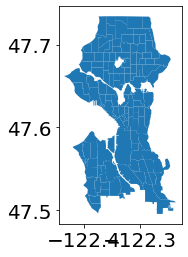

In [42]:
pop_2010.plot()

In [ ]:
fig, axes = plt.subplots()


In [40]:
census_bounds.head(1)

,OBJECTID,TRACT,TRACTCE10,GEOID10,NAME10,NAMELSAD10,ACRES_TOTAL,WATER,SHAPE_Length,SHAPE_Area,geometry
0,1,2500,002500,53033002500,25,Census Tract 25,243.219083,0,16442.968402,1.059462e+07,"POLYGON ((-122.29602 47.69023, -122.29608 47.6..."


<AxesSubplot:>

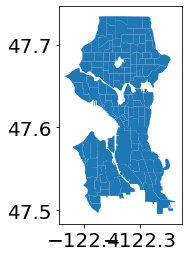

In [41]:
census_bounds_cleaned.plot()

In [57]:
pop_zips = gpd.sjoin(zips, pop_2010, op='intersects')

In [58]:
pop_zips.head()

,geometry,NAME10_left,SHAPE_Area_left,index_right,GEOID10,NAME10_right,ACRES_TOTAL,Total_Population,OBJECTID
ZIPCODE,,,,,,,,,
98101,"POLYGON ((-122.34598 47.60892, -122.34490 47.6...",74.02,1.470012e+07,73,53033007402,74.02,61.596617,4921.0,74
98102,"POLYGON ((-122.33574 47.64203, -122.33108 47.6...",74.02,4.322189e+07,73,53033007402,74.02,61.596617,4921.0,74
98122,"POLYGON ((-122.32845 47.61473, -122.32802 47.6...",74.02,6.454818e+07,73,53033007402,74.02,61.596617,4921.0,74
98101,"POLYGON ((-122.34598 47.60892, -122.34490 47.6...",74.02,1.470012e+07,75,53033007401,74.01,64.092745,4115.0,76
98102,"POLYGON ((-122.33574 47.64203, -122.33108 47.6...",74.02,4.322189e+07,75,53033007401,74.01,64.092745,4115.0,76


In [59]:
len(pop_zips)

288

<AxesSubplot:>

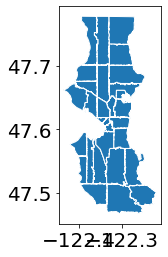

In [60]:
pop_zips.plot(edgecolor = 'white')

In [61]:
pop_zips_diss = pop_zips.dissolve(by='ZIPCODE', aggfunc='sum')

In [62]:
pop_zips_diss.head()

,geometry,NAME10_left,SHAPE_Area_left,index_right,NAME10_right,ACRES_TOTAL,Total_Population,OBJECTID
ZIPCODE,,,,,,,,
98101,"POLYGON ((-122.34598 47.60892, -122.34490 47.6...",666.18,1.323011e+08,735,703.05,1110.909046,35650.0,744
98102,"POLYGON ((-122.33574 47.64203, -122.33108 47.6...",592.16,3.457751e+08,606,550.03,1992.671717,36327.0,614
98103,"POLYGON ((-122.35808 47.69966, -122.35741 47.6...",900.00,2.880166e+09,630,680.03,5703.153426,89326.0,650
98104,"POLYGON ((-122.34105 47.59627, -122.34031 47.5...",924.00,2.319603e+08,829,942.00,3666.615852,39905.0,840
98105,"MULTIPOLYGON (((-122.32859 47.66646, -122.3285...",559.13,1.261461e+09,684,603.06,4272.632671,67792.0,697


<AxesSubplot:>

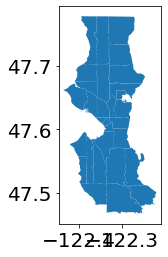

In [63]:
pop_zips_diss.plot()

In [64]:
total_pop = pop_zips_diss['Total_Population'].sum()
total_pop

1312471.0

In [90]:
pop_zips_diss['Pop_fraction'] = pop_zips_diss['Total_Population']/total_pop
pop_zips_diss.head()

,geometry,NAME10_left,SHAPE_Area_left,index_right,NAME10_right,ACRES_TOTAL,Total_Population,OBJECTID,Pop_fraction
ZIPCODE,,,,,,,,,
98101,"POLYGON ((-122.34598 47.60892, -122.34490 47.6...",74.02,1.470012e+07,81.666667,78.116667,123.434338,3961.111111,82.666667,0.006509
98102,"POLYGON ((-122.33574 47.64203, -122.33108 47.6...",74.02,4.322189e+07,75.750000,68.753750,249.083965,4540.875000,76.750000,0.007462
98103,"POLYGON ((-122.35808 47.69966, -122.35741 47.6...",45.00,1.440083e+08,31.500000,34.001500,285.157671,4466.300000,32.500000,0.007339
98104,"POLYGON ((-122.34105 47.59627, -122.34031 47.5...",84.00,2.108730e+07,75.363636,85.636364,333.328714,3627.727273,76.363636,0.005961
98105,"MULTIPOLYGON (((-122.32859 47.66646, -122.3285...",43.01,9.703543e+07,52.615385,46.389231,328.664052,5214.769231,53.615385,0.008569


In [73]:
years = list(range(2007, 2019))
years

[2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

In [74]:
populations = [585436, 591870, 598539, 608660, 622694, 635928, 653588, 670109, 687386, 709631, 728661, 742235]

In [75]:
pop_by_year = dict(zip(years, populations))
pop_by_year

{2007: 585436,
 2008: 591870,
 2009: 598539,
 2010: 608660,
 2011: 622694,
 2012: 635928,
 2013: 653588,
 2014: 670109,
 2015: 687386,
 2016: 709631,
 2017: 728661,
 2018: 742235}

In [82]:
pop_by_year.get(2015)

687386

In [86]:
def est_zip_pop(year, pop_zips_diss, pop_by_year):
    pop_frac = pop_zips_diss['Pop_fraction'].values
    year_pop = pop_by_year.get(year)
    pop_zip_year = pop_zips_diss
    pop_zip_year['Total_Population'] = pop_frac*year_pop
    return pop_zip_year

In [87]:
pop_zip_2007 = est_zip_pop(2007, pop_zips_diss, pop_by_year)
pop_zip_2007.head()

,Zipcode,geometry,Area,index_right,NAME10,Total_Population,Pop_fraction
0,98101,"POLYGON ((-122.33574 47.64203, -122.33108 47.6...",4.322189e+07,75.750000,68.753750,4202.426765,0.007178
1,98102,"MULTIPOLYGON (((-122.31863 47.63041, -122.3186...",8.818645e+07,73.600000,70.000000,4212.537485,0.007196
2,98103,"MULTIPOLYGON (((-122.32859 47.66646, -122.3285...",9.703543e+07,52.615385,46.389231,4826.093163,0.008244
3,98104,"POLYGON ((-122.33040 47.68309, -122.33028 47.6...",1.813559e+08,35.954545,29.091364,3771.401355,0.006442
4,98105,"POLYGON ((-122.35808 47.69966, -122.35741 47.6...",1.440083e+08,31.500000,34.001500,4133.410116,0.007060


In [88]:
total_pop_2007 = pop_zip_2007['Total_Population'].sum()
total_pop_2007

131948.89375788497

## DataFrames

**Traffic Flow Density by Year**

In [132]:
df_traffic_7 = get_traffic_df(7)

(132, 2)


In [119]:
df_traffic_8 = get_traffic_df(8)

In [120]:
df_traffic_9 = get_traffic_df(9)

In [121]:
df_traffic_10 = get_traffic_df(10)

In [122]:
df_traffic_11 = get_traffic_df(11)

In [124]:
df_traffic_12 = get_traffic_df(12)

In [125]:
df_traffic_13 = get_traffic_df(13)

In [126]:
df_traffic_14 = get_traffic_df(14)

In [127]:
df_traffic_15 = get_traffic_df(15)

In [128]:
df_traffic_16 = get_traffic_df(16)

In [129]:
df_traffic_17 = get_traffic_df(17)

In [130]:
df_traffic_18 = get_traffic_df(18)

**Bike Lanes Density**

In [131]:
df_lanes
#Index 0 is NAME10, 1 is year, 2 is feet of bike lanes added in that region that year, adjusted for area of tract

,0,1,2
0,1,2011,0.8714617619474354
1,10,2013,0.561771181757596
2,10,2017,0.8885033805558079
3,100.01,2017,0.3968428770965108
4,100.02,2004,0.5896069313812291
...,...,...,...
168,99,2011,0.13420479270539795
169,99,2014,0.040350030274366164
170,99,2015,0.03717956612156383
171,99,2017,0.0918795142517553
